In [80]:
import pandas as pd
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from sklearn.feature_extraction import stop_words
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
import time
import numpy as np
from datetime import datetime, timedelta


In [2]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words



In [3]:
import requests
import bs4
import os

base_url = "http://www.presidency.ucsb.edu/"
speech_list = "http://www.presidency.ucsb.edu/2016_election_speeches.php?candidate=45&campaign=2016TRUMP&doctype=5000"
if not os.path.isdir('data'):
   os.mkdir('data')



# Grab page
res = requests.get(speech_list)
scrape = bs4.BeautifulSoup(res.text, 'lxml')
elements1 = scrape.select('td.listdate')
links1 = []
for i in elements1:
  links1.append(i.text)
links2 =[]
links2.append(links1[1::3])
elems = scrape.select('td.listdate a')
links = []

for e in elems:
    links.append((e.text, e.attrs['href']))
speeches = []
for idx, link in enumerate(links):
#     print("Grabbing speech: ", idx + 1)
    url = base_url + link[1][3:]
    res = requests.get(url)
    scrape = bs4.BeautifulSoup(res.text, 'lxml')
    speech = scrape.select('span.displaytext')[0].text.encode('utf-8')
    speeches.append(speech)

d = {'title' : pd.Series([l for l in links]),
     'dates' : pd.Series(links2[0]),
     'link' : pd.Series([base_url + l[1][3:] for l in links]),
     'speech': pd.Series(speeches)}
df = pd.DataFrame(d)
df = df.drop(['link', 'title'], 1)




In [4]:
trump_df = df
trump_df.head()

,dates,speech
0,"June 16, 2015",b'Trump: Wow. Whoa. That is some group of peop...
1,"March 21, 2016",b' Good evening. Thank you very much. I speak ...
2,"April 27, 2016",b'Thank you for the opportunity to speak to yo...
3,"June 13, 2016",b'Thank you for joining me today.This was goin...
4,"June 22, 2016",b'Today I\'d like to share my thoughts about t...


In [5]:
dijsselbloem_df = pd.read_csv("Dijsselbloem.csv")



In [6]:
statement_df = pd.read_csv("statement.csv")
statement_df.tail(2)

,Speaker,date,speech,Link
37,Common,05.22.2017,The Eurogroup welcomed the preliminary agreeme...,http://www.consilium.europa.eu/en/meetings/eur...
38,Common,06.15.2017,The Eurogroup finalised its discussion on the ...,http://www.consilium.europa.eu/en/meetings/eur...


In [7]:
regling_df = pd.read_csv("regling.csv")
regling_df = regling_df.drop(regling_df.index[-9:])


In [8]:
moscovici_df = pd.read_csv("Moscovici_English.csv")

In [9]:
mosco_fr = pd.read_csv("Moscovici_french.csv")



In [10]:
moscovici_df = pd.concat([mosco_fr, moscovici_df], ignore_index=True)



In [11]:
dijsselbloem_df.tail()

,Speaker,date,speech
35,Jeroen Dijsselbloem,02.20.2017,Let me come quickly to the topic that probably...
36,Jeroen Dijsselbloem,03.20.2017,Let me start with our discussion on Greece. We...
37,Jeroen Dijsselbloem,04.07.2017,Let me start with Greece. We have achieved sig...
38,Jeroen Dijsselbloem,06.22.2017,"I will only speak about Greece, because I thin..."
39,Jeroen Dijsselbloem,06.15.2017,"Our meeting revolved mainly around Greece, and..."


In [12]:
moscovici_df.tail()

,Speaker,date,speech,Link
18,Pierre Moscovici,11.17.2015,The Greek authorities and the institutions hav...,http://europa.eu/rapid/press-release_STATEMENT...
19,Pierre Moscovici,02.11.2016,Now a word on Greece.\nOur winter forecast las...,http://europa.eu/rapid/press-release_SPEECH-16...
20,Pierre Moscovici,10.10.2016,Thank you Jeroen. Bonsoir à toutes et à tous. ...,http://europa.eu/rapid/press-release_SPEECH-16...
21,Pierre Moscovici,02.20.2017,The further fiscal measures to be pre-legislat...,http://europa.eu/rapid/press-release_SPEECH-17...
22,Pierre Moscovici,05.02.2017,"""The agreement reached overnight in Athens on ...",http://europa.eu/rapid/press-release_STATEMENT...


In [13]:
regling_df.tail()

,Speaker,date,speech,Link
7,Klaus Regling,03.20.2017,Just a few words on Greece from the ESM perspe...,https://www.esm.europa.eu/press-releases/klaus...
8,Klaus Regling,04.07.2017,"But of course, Greece was important and I shar...",https://www.esm.europa.eu/press-releases/klaus...
9,Klaus Regling,05.23.2017,"There was progress, and I think it’s really go...",https://www.esm.europa.eu/press-releases/klaus...
10,Klaus Regling,06.12.2017,A few words on Greece from the ESM perspective...,https://www.esm.europa.eu/press-releases/klaus...
11,Klaus Regling,07.10.2017,"Let me start with Greece, which was not on the...",https://www.esm.europa.eu/press-releases/klaus...


In [14]:
filepath = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df['stemmed'] = emolex_df.word.apply(lambda word: TextBlob(word).tokens[0].stem())
emolex_stemmed_df = emolex_df.drop_duplicates(subset=['stemmed'])
emolex_stemmed_df
emolex_stemmed_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,stemmed
0,aback,0,0,0,0,0,0,0,0,0,0,aback
1,abacus,0,0,0,0,0,0,0,0,0,1,abacu
2,abandon,0,0,0,1,0,1,0,1,0,0,abandon
5,abate,0,0,0,0,0,0,0,0,0,0,abat
7,abba,0,0,0,0,0,0,1,0,0,0,abba


In [15]:
regling_df.tail()


,Speaker,date,speech,Link
7,Klaus Regling,03.20.2017,Just a few words on Greece from the ESM perspe...,https://www.esm.europa.eu/press-releases/klaus...
8,Klaus Regling,04.07.2017,"But of course, Greece was important and I shar...",https://www.esm.europa.eu/press-releases/klaus...
9,Klaus Regling,05.23.2017,"There was progress, and I think it’s really go...",https://www.esm.europa.eu/press-releases/klaus...
10,Klaus Regling,06.12.2017,A few words on Greece from the ESM perspective...,https://www.esm.europa.eu/press-releases/klaus...
11,Klaus Regling,07.10.2017,"Let me start with Greece, which was not on the...",https://www.esm.europa.eu/press-releases/klaus...


In [16]:
vec = TfidfVectorizer(vocabulary=emolex_stemmed_df.stemmed,
                      use_idf=False,
                      stop_words='english',
                      tokenizer=textblob_tokenizer,
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(dijsselbloem_df['speech'])
vocab = vec.get_feature_names()
wordcount_df1 = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df1.head()

,aback,abacu,abandon,abat,abba,abbot,abbrevi,abdomen,abdomin,abduct,...,zenith,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoolog,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
vec = TfidfVectorizer(vocabulary=emolex_stemmed_df.stemmed,
                      use_idf=False,
                      stop_words='english',
                      tokenizer=textblob_tokenizer,
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(trump_df['speech'])
vocab = vec.get_feature_names()
wordcount_df4 = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df4.head()



,aback,abacu,abandon,abat,abba,abbot,abbrevi,abdomen,abdomin,abduct,...,zenith,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoolog,zoom
0,0.0,0.0,0.000536,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.001418,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000818,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000981,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
vec = TfidfVectorizer(vocabulary=emolex_stemmed_df.stemmed,
                      use_idf=False,
                      stop_words='english',
                      tokenizer=textblob_tokenizer,
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(statement_df['speech'])
vocab = vec.get_feature_names()
wordcount_df3 = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df3.head()

,aback,abacu,abandon,abat,abba,abbot,abbrevi,abdomen,abdomin,abduct,...,zenith,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoolog,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
vec = TfidfVectorizer(vocabulary=emolex_stemmed_df.stemmed,
                      use_idf=False, 
                      tokenizer=textblob_tokenizer,
                      stop_words='english',

                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(moscovici_df['speech'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacu,abandon,abat,abba,abbot,abbrevi,abdomen,abdomin,abduct,...,zenith,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoolog,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.024096,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [20]:
vec = TfidfVectorizer(vocabulary=emolex_stemmed_df.stemmed,
                      tokenizer=textblob_tokenizer,
                      use_idf=False,
                      stop_words='english',
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(regling_df['speech'])
vocab = vec.get_feature_names()
wordcount_df2 = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df2.head()

,aback,abacu,abandon,abat,abba,abbot,abbrevi,abdomen,abdomin,abduct,...,zenith,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoolog,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
positive_words = emolex_stemmed_df[emolex_stemmed_df.positive == 1].stemmed
dijsselbloem_df['positivity'] = wordcount_df1[positive_words].sum(axis=1)


angry_words = emolex_stemmed_df[emolex_stemmed_df.anger == 1].stemmed
dijsselbloem_df['anger'] = wordcount_df1[angry_words].sum(axis=1)

anticipating_words = emolex_stemmed_df[emolex_stemmed_df.anticipation == 1].stemmed
dijsselbloem_df['anticipation'] = wordcount_df1[anticipating_words].sum(axis=1)

disgusting_words = emolex_stemmed_df[emolex_stemmed_df.disgust == 1].stemmed
dijsselbloem_df['disgust'] = wordcount_df1[disgusting_words].sum(axis=1)

fear_words = emolex_stemmed_df[emolex_stemmed_df.fear == 1].stemmed
dijsselbloem_df['fear'] = wordcount_df1[fear_words].sum(axis=1)

joy = emolex_stemmed_df[emolex_stemmed_df.joy == 1].stemmed
dijsselbloem_df['joy'] = wordcount_df1[joy].sum(axis=1)






In [22]:
dijsselbloem_df['date'] = pd.to_datetime(dijsselbloem_df['date'], format="%m.%d.%Y")

In [23]:
dijsselbloem_df.set_index('date', inplace=True)

In [24]:
dijsselbloem_df.tail()

,Speaker,speech,positivity,anger,anticipation,disgust,fear,joy
date,,,,,,,,
2017-02-20,Jeroen Dijsselbloem,Let me come quickly to the topic that probably...,0.266667,0.008333,0.116667,0.000000,0.041667,0.050000
2017-03-20,Jeroen Dijsselbloem,Let me start with our discussion on Greece. We...,0.222222,0.000000,0.155556,0.000000,0.000000,0.066667
2017-04-07,Jeroen Dijsselbloem,Let me start with Greece. We have achieved sig...,0.264463,0.000000,0.099174,0.000000,0.016529,0.049587
2017-06-22,Jeroen Dijsselbloem,"I will only speak about Greece, because I thin...",0.190789,0.013158,0.125000,0.000000,0.006579,0.046053
2017-06-15,Jeroen Dijsselbloem,"Our meeting revolved mainly around Greece, and...",0.273438,0.015625,0.078125,0.015625,0.039062,0.050781


In [25]:
positive_words = emolex_stemmed_df[emolex_stemmed_df.positive == 1].stemmed
moscovici_df['positivity'] = wordcount_df[positive_words].sum(axis=1)


angry_words = emolex_stemmed_df[emolex_stemmed_df.anger == 1].stemmed
moscovici_df['anger'] = wordcount_df[angry_words].sum(axis=1)

anticipating_words = emolex_stemmed_df[emolex_stemmed_df.anticipation == 1].stemmed
moscovici_df['anticipation'] = wordcount_df[anticipating_words].sum(axis=1)

disgusting_words = emolex_stemmed_df[emolex_stemmed_df.disgust == 1].stemmed
moscovici_df['disgust'] = wordcount_df[disgusting_words].sum(axis=1)

fear_words = emolex_stemmed_df[emolex_stemmed_df.fear == 1].stemmed
moscovici_df['fear'] = wordcount_df[fear_words].sum(axis=1)

joy = emolex_stemmed_df[emolex_stemmed_df.joy == 1].stemmed
moscovici_df['joy'] = wordcount_df[joy].sum(axis=1)







In [26]:
moscovici_df['date'] = pd.to_datetime(moscovici_df['date'], format="%m.%d.%Y")


In [27]:

moscovici_df.set_index('date', inplace=True)

In [28]:
moscovici_df.head()

,Speaker,speech,Link,positivity,anger,anticipation,disgust,fear,joy
date,,,,,,,,,
2015-09-12,Pierre Moscovici,Je commence par un mot sur la Grèce et sur Chy...,http://europa.eu/rapid/press-release_SPEECH-15...,0.092105,0.013158,0.026316,0.000000,0.000000,0.000000
2015-11-09,Pierre Moscovici,Merci Jeroen. \nJ’ai effectivement informé l’E...,http://europa.eu/rapid/press-release_SPEECH-15...,0.337349,0.024096,0.036145,0.048193,0.036145,0.036145
2015-11-23,Pierre Moscovici,Je vais être très bref car Jeroen a dit l'esse...,http://europa.eu/rapid/press-release_STATEMENT...,0.318182,0.000000,0.136364,0.045455,0.022727,0.022727
2015-12-07,Pierre Moscovici,Je vais commencer par quelques mots sur la Grè...,http://europa.eu/rapid/press-release_SPEECH-15...,0.206897,0.017241,0.068966,0.017241,0.034483,0.068966
2016-01-14,Pierre Moscovici,"Tout d’abord, mes meilleurs vœux à chacune et ...",http://europa.eu/rapid/press-release_SPEECH-16...,0.253333,0.013333,0.026667,0.000000,0.013333,0.013333


In [29]:
positive_words = emolex_stemmed_df[emolex_stemmed_df.positive == 1].stemmed
regling_df['positivity'] = wordcount_df2[positive_words].sum(axis=1)


angry_words = emolex_stemmed_df[emolex_stemmed_df.anger == 1].stemmed
regling_df['anger'] = wordcount_df2[angry_words].sum(axis=1)

anticipating_words = emolex_stemmed_df[emolex_stemmed_df.anticipation == 1].stemmed
regling_df['anticipation'] = wordcount_df2[anticipating_words].sum(axis=1)

disgusting_words = emolex_stemmed_df[emolex_stemmed_df.disgust == 1].stemmed
regling_df['disgust'] = wordcount_df2[disgusting_words].sum(axis=1)

fear_words = emolex_stemmed_df[emolex_stemmed_df.fear == 1].stemmed
regling_df['fear'] = wordcount_df2[fear_words].sum(axis=1)

joy = emolex_stemmed_df[emolex_stemmed_df.joy == 1].stemmed
regling_df['joy'] = wordcount_df2[joy].sum(axis=1)








In [30]:
regling_df['date'] = pd.to_datetime(regling_df['date'], format="%m.%d.%Y")
regling_df.set_index('date', inplace=True)

In [31]:
regling_df.head()

,Speaker,speech,Link,positivity,anger,anticipation,disgust,fear,joy
date,,,,,,,,,
2016-04-22,Klaus Regling,A few words on Greece from the ESM perspective...,https://www.esm.europa.eu/press-releases/trans...,0.287037,0.009259,0.148148,0.018519,0.027778,0.101852
2016-05-25,Klaus Regling,The Eurogroup welcomes that a full staff-level...,https://www.esm.europa.eu/press-releases/eurog...,0.204819,0.017212,0.077453,0.017212,0.015491,0.036145
2016-10-10,Klaus Regling,Let me give you a few more details on the disb...,https://www.esm.europa.eu/press-releases/trans...,0.228571,0.007143,0.121429,0.000000,0.000000,0.057143
2016-11-07,Klaus Regling,"On Greece, you’ve heard about the progress the...",https://www.esm.europa.eu/press-releases/trans...,0.182609,0.030435,0.126087,0.000000,0.017391,0.086957
2016-12-05,Klaus Regling,"Good evening, let me say a few words about the...",https://www.esm.europa.eu/press-releases/trans...,0.166163,0.021148,0.108761,0.009063,0.039275,0.066465


In [32]:
dijsselbloem_df = dijsselbloem_df.replace(np.NaN, 0)

In [33]:
moscovici_df = moscovici_df.replace(np.NaN, 0)

In [34]:
regling_df = regling_df.replace(np.NaN, 0)

In [35]:
regling_df.head(5)

,Speaker,speech,Link,positivity,anger,anticipation,disgust,fear,joy
date,,,,,,,,,
2016-04-22,Klaus Regling,A few words on Greece from the ESM perspective...,https://www.esm.europa.eu/press-releases/trans...,0.287037,0.009259,0.148148,0.018519,0.027778,0.101852
2016-05-25,Klaus Regling,The Eurogroup welcomes that a full staff-level...,https://www.esm.europa.eu/press-releases/eurog...,0.204819,0.017212,0.077453,0.017212,0.015491,0.036145
2016-10-10,Klaus Regling,Let me give you a few more details on the disb...,https://www.esm.europa.eu/press-releases/trans...,0.228571,0.007143,0.121429,0.000000,0.000000,0.057143
2016-11-07,Klaus Regling,"On Greece, you’ve heard about the progress the...",https://www.esm.europa.eu/press-releases/trans...,0.182609,0.030435,0.126087,0.000000,0.017391,0.086957
2016-12-05,Klaus Regling,"Good evening, let me say a few words about the...",https://www.esm.europa.eu/press-releases/trans...,0.166163,0.021148,0.108761,0.009063,0.039275,0.066465


In [36]:
positive_words = emolex_stemmed_df[emolex_stemmed_df.positive == 1].stemmed
statement_df['positivity'] = wordcount_df3[positive_words].sum(axis=1)


angry_words = emolex_stemmed_df[emolex_stemmed_df.anger == 1].stemmed
statement_df['anger'] = wordcount_df3[angry_words].sum(axis=1)

anticipating_words = emolex_stemmed_df[emolex_stemmed_df.anticipation == 1].stemmed
statement_df['anticipation'] = wordcount_df3[anticipating_words].sum(axis=1)

disgusting_words = emolex_stemmed_df[emolex_stemmed_df.disgust == 1].stemmed
statement_df['disgust'] = wordcount_df3[disgusting_words].sum(axis=1)

fear_words = emolex_stemmed_df[emolex_stemmed_df.fear == 1].stemmed
statement_df['fear'] = wordcount_df3[fear_words].sum(axis=1)

joy = emolex_stemmed_df[emolex_stemmed_df.joy == 1].stemmed
statement_df['joy'] = wordcount_df3[joy].sum(axis=1)








In [37]:
statement_df['date'] = pd.to_datetime(statement_df['date'], format="%m.%d.%Y")
statement_df.set_index('date', inplace=True)
statement_df = statement_df.replace(np.NaN, 0)

In [38]:
statement_df.tail()

,Speaker,speech,Link,positivity,anger,anticipation,disgust,fear,joy
date,,,,,,,,,
2017-02-20,Common,"The institutions (the European Commission, the...",http://www.consilium.europa.eu/en/meetings/eur...,0.300000,0.000000,0.040000,0.000000,0.000000,0.060000
2017-03-20,Common,"The institutions (the European Commission, the...",http://www.consilium.europa.eu/en/meetings/eur...,0.314815,0.018519,0.092593,0.018519,0.018519,0.055556
2017-04-07,Common,The Eurogroup was briefed on developments in t...,http://www.consilium.europa.eu/en/meetings/eur...,0.319149,0.021277,0.085106,0.021277,0.021277,0.021277
2017-05-22,Common,The Eurogroup welcomed the preliminary agreeme...,http://www.consilium.europa.eu/en/meetings/eur...,0.290323,0.000000,0.080645,0.000000,0.000000,0.064516
2017-06-15,Common,The Eurogroup finalised its discussion on the ...,http://www.consilium.europa.eu/en/meetings/eur...,0.262712,0.000000,0.076271,0.000000,0.008475,0.042373


In [39]:
positive_words = emolex_stemmed_df[emolex_stemmed_df.positive == 1].stemmed
trump_df['positivity'] = wordcount_df4[positive_words].sum(axis=1)


angry_words = emolex_stemmed_df[emolex_stemmed_df.anger == 1].stemmed
trump_df['anger'] = wordcount_df4[angry_words].sum(axis=1)

anticipating_words = emolex_stemmed_df[emolex_stemmed_df.anticipation == 1].stemmed
trump_df['anticipation'] = wordcount_df4[anticipating_words].sum(axis=1)

disgusting_words = emolex_stemmed_df[emolex_stemmed_df.disgust == 1].stemmed
trump_df['disgust'] = wordcount_df4[disgusting_words].sum(axis=1)

fear_words = emolex_stemmed_df[emolex_stemmed_df.fear == 1].stemmed
trump_df['fear'] = wordcount_df4[fear_words].sum(axis=1)

joy = emolex_stemmed_df[emolex_stemmed_df.joy == 1].stemmed
trump_df['joy'] = wordcount_df4[joy].sum(axis=1)







In [40]:
trump_df.head()

,dates,speech,positivity,anger,anticipation,disgust,fear,joy
0,"June 16, 2015",b'Trump: Wow. Whoa. That is some group of peop...,0.267809,0.041243,0.093733,0.023567,0.049813,0.117300
1,"March 21, 2016",b' Good evening. Thank you very much. I speak ...,0.259574,0.099291,0.130496,0.046809,0.136170,0.119149
2,"April 27, 2016",b'Thank you for the opportunity to speak to yo...,0.248569,0.077678,0.103843,0.031071,0.116926,0.096484
3,"June 13, 2016",b'Thank you for joining me today.This was goin...,0.192615,0.100798,0.063872,0.040918,0.151697,0.044910
4,"June 22, 2016",b'Today I\'d like to share my thoughts about t...,0.210010,0.080471,0.097154,0.042198,0.110893,0.076546


In [41]:
trump_df['dates'] = pd.to_datetime(trump_df['dates'], format="%B %d, %Y")
trump_df.set_index('dates', inplace=True)
trump_df = trump_df.replace(np.NaN, 0)

In [42]:
trump_df.head(1)

,speech,positivity,anger,anticipation,disgust,fear,joy
dates,,,,,,,
2015-06-16,b'Trump: Wow. Whoa. That is some group of peop...,0.267809,0.041243,0.093733,0.023567,0.049813,0.1173


In [ ]:
ax = dijsselbloem_df.plot(y='anticipation', marker='o', linestyle='', figsize=(8,8), c='blue')
moscovici_df.plot(y='anticipation', marker='o', linestyle='', c='red', ax=ax)

In [ ]:
ax = dijsselbloem_df.plot(y='positivity', marker='o', linestyle='', figsize=(8,8), c='blue')
moscovici_df.plot(y='positivity', marker='o', linestyle='', c='red', ax=ax)

In [ ]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='positivity', y='anticipation', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='positivity', y='anticipation', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='positivity', y='anticipation', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

In [ ]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='fear', y='anticipation', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='fear', y='anticipation', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='fear', y='anticipation', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.3)
ax.set_ylim(0,0.3)

In [ ]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='joy', y='anticipation', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='joy', y='anticipation', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='joy', y='anticipation', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.3)
ax.set_ylim(0,0.3)

In [ ]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='joy', y='positivity', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='joy', y='positivity', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='joy', y='positivity', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

In [ ]:
dijsselbloem_df.head(1)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.positivity)
ax.scatter(x= moscovici_df.index, y = moscovici_df.positivity, color='red')
ax.scatter(x= regling_df.index, y = regling_df.positivity, color='green')




In [ ]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='joy', y='positivity', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='joy', y='positivity', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='joy', y='positivity', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

In [ ]:
dijsselbloem_df.head(1)

In [ ]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='fear', y='anticipation', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='fear', y='anticipation', c='red', ax=ax, marker='o', linestyle='')

ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

In [ ]:
dijsselbloem_df[0:20]

In [ ]:
%%time
from sklearn.cluster import KMeans

# How many clusters?
number_of_clusters=5
km = KMeans(n_clusters=number_of_clusters)

print("Fitting", number_of_clusters, "clusters usinga ", matrix.shape, "matrix")

# Let's fit it!
km.fit(matrix)
km.fit

In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(
                      stop_words='english',
                      max_df= 0.9,
                    max_features = 250,
        ngram_range=(3,3),


                      use_idf=True)

# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(dijsselbloem_df['speech'][0:20])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

In [ ]:
%%time
from sklearn.cluster import KMeans

# How many clusters?
number_of_clusters=5
km = KMeans(n_clusters=number_of_clusters)

print("Fitting", number_of_clusters, "clusters usinga ", matrix.shape, "matrix")

# Let's fit it!
km.fit(matrix)
km.fit

In [ ]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, '| '.join(top_ten_words)))

In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(
                      stop_words='english',
    ngram_range=(3,3),
                      max_df= 0.9,
                    max_features = 250,
                      use_idf=True)

# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(dijsselbloem_df['speech'][21:])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

In [ ]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, '| '.join(top_ten_words)))

In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(
                      stop_words='english',
        ngram_range=(3,3),


                      max_df= 0.9,
                    max_features = 250,
                      use_idf=True)

# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(moscovici_df['speech'][0:3])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

In [ ]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(
                      stop_words='english',
                      max_df= 0.9,
                    max_features = 250,
                      use_idf=True,
                      ngram_range=(2,2))



# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(moscovici_df['speech'][4:])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

In [ ]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(
                      stop_words='english',
                      max_df= 0.9,
                    max_features = 250,
                      use_idf=True)

# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(moscovici_df['speech'][4:])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

In [ ]:
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False,
                      stop_words='english',
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(regling_df['speech'])
vocab = vec.get_feature_names()
wordcount_df1 = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df1.head()

In [ ]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words



In [ ]:
regling_words = regling_df['speech'].apply(textblob_tokenizer)

In [ ]:
for word in regling_words:
    print("ORIGINAL:", word, "| LEMMA:", word.lemmatize(), "| STEM:", word.stem())


In [ ]:
# vec = TfidfVectorizer(vocabulary=emolex_df.word,
#                       tokenizer=textblob_tokenizer,
#                       use_idf=False,
#                       stop_words='english',
#                       norm='l1') # ELL - ONE
# matrix = vec.fit_transform(regling_df['speech'])
# vocab = vec.get_feature_names()
# wordcount_df1 = pd.DataFrame(matrix.toarray(), columns=vocab)
# wordcount_df1.head()

In [ ]:
emolex_df.word.head()

In [ ]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='joy', y='positivity', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='joy', y='positivity', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='joy', y='positivity', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

In [ ]:
dijsselbloem_df.resample('m').head()

In [ ]:
dijsselbloem_df.resample('m').dropna().reset_index().plot(kind='scatter',x='date', y='positivity')

In [ ]:
dijsselbloem_df.resample('2w').dropna().reset_index().plot(y='positivity', x='index')

In [ ]:
dijsselbloem_df.head(1)

(0, 0.6)

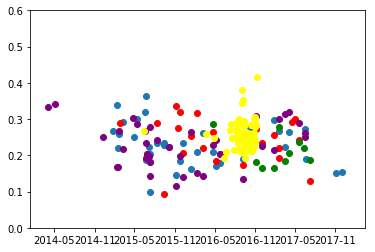

In [55]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.positivity)
ax.scatter(x= moscovici_df.index, y = moscovici_df.positivity, color='red')
ax.scatter(x= regling_df.index, y = regling_df.positivity, color='green')
ax.scatter(x= statement_df.index, y = statement_df.positivity, color='purple')
ax.scatter(x= trump_df.index, y = trump_df.positivity, color='yellow')




ax.set_ylim(0,0.6)


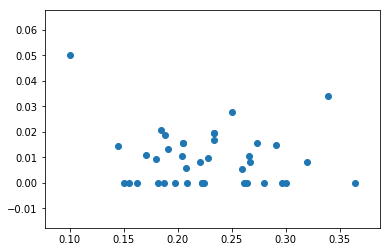

In [54]:
x = dijsselbloem_df.anger
y = dijsselbloem_df.positivity
fig, ax = plt.subplots()

ax.scatter(x= dijsselbloem_df.positivity, y = dijsselbloem_df.anger)

plt.show()

In [42]:
df.head(1)

,dates,speech,positivity,anger,anticipation,disgust,fear,joy
0,"June 16, 2015",b'Trump: Wow. Whoa. That is some group of peop...,0.267809,0.041243,0.093733,0.023567,0.049813,0.1173


In [ ]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.anger)
ax.scatter(x= moscovici_df.index, y = moscovici_df.anger, color='red')
ax.scatter(x= regling_df.index, y = regling_df.anger, color='green')
ax.scatter(x= statement_df.index, y = statement_df.anger, color='purple')
ax.scatter(x= trump_df.index, y = trump_df.anger, color='yellow')



ax.set_ylim(0,0.3)




In [ ]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.disgust)
ax.scatter(x= moscovici_df.index, y = moscovici_df.disgust, color='red')
ax.scatter(x= regling_df.index, y = regling_df.disgust, color='green')

ax.scatter(x= statement_df.index, y = statement_df.disgust, color='purple')
ax.scatter(x= trump_df.index, y = trump_df.disgust, color='yellow')





ax.set_ylim(0,0.3)


In [ ]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.joy)
ax.scatter(x= moscovici_df.index, y = moscovici_df.joy, color='red')
ax.scatter(x= regling_df.index, y = regling_df.joy, color='green')
ax.scatter(x= statement_df.index, y = statement_df.joy, color='purple')
ax.scatter(x= trump_df.index, y = trump_df.joy, color='yellow')



ax.set_ylim(0,0.3)







In [ ]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.fear)
ax.scatter(x= moscovici_df.index, y = moscovici_df.fear, color='red')
ax.scatter(x= regling_df.index, y = regling_df.fear, color='green')
ax.scatter(x= statement_df.index, y = statement_df.fear, color='purple')
ax.scatter(x= trump_df.index, y = trump_df.fear, color='yellow')


ax.set_ylim(0,0.3)




plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.fear)
ax.scatter(x= moscovici_df.index, y = moscovici_df.fear, color='red')
ax.scatter(x= regling_df.index, y = regling_df.fear, color='green')
ax.scatter(x= statement_df.index, y = statement_df.fear, color='purple')
ax.scatter(x= df_trump.index, y = df_trump.fear, color='yellow')


ax.set_ylim(0,0.3)




In [ ]:
moscovici_df.sort_values('disgust', ascending=False).head(2)

In [ ]:
moscovici_df.sort_values('fear', ascending=False).head(2)

TypeError: You must first set_array for mappable

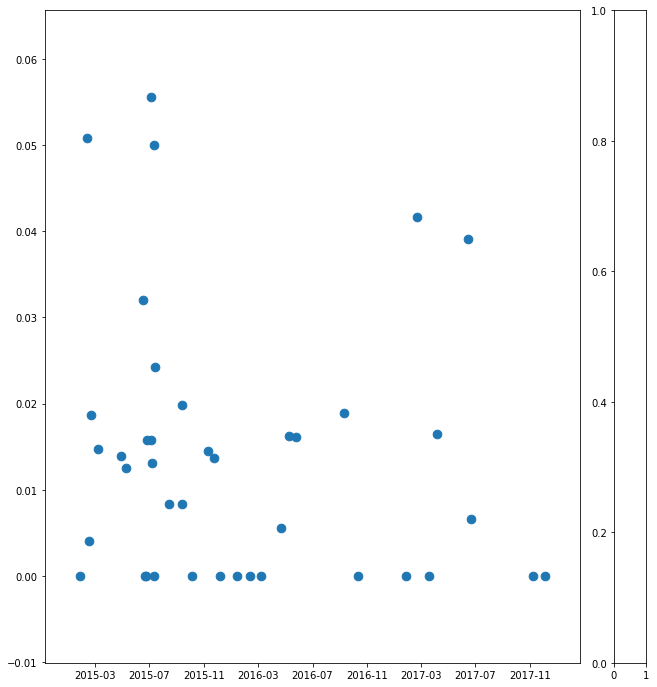

In [45]:
fig, ax = plt.subplots(figsize=(12,12))
points = plt.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.fear, s=75)

#points = plt.scatter(x = data['Date'], y = data["Words"], c=data["Words"], s=75, cmap="BrBG")

plt.colorbar(points)
sns.regplot(x = dijsselbloem_df.index, y = dijsselbloem_df.fear, data=dijsselbloem_df, scatter=False, color='r')



AttributeError: 'DatetimeIndex' object has no attribute 'mean'

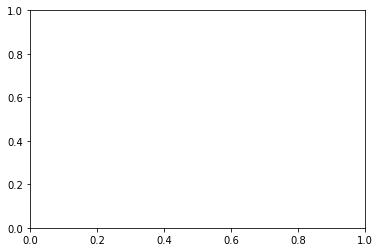

In [46]:
sns.regplot(x=dijsselbloem_df.index, y=dijsselbloem_df.fear, data=dijsselbloem_df);

TypeError: invalid type promotion

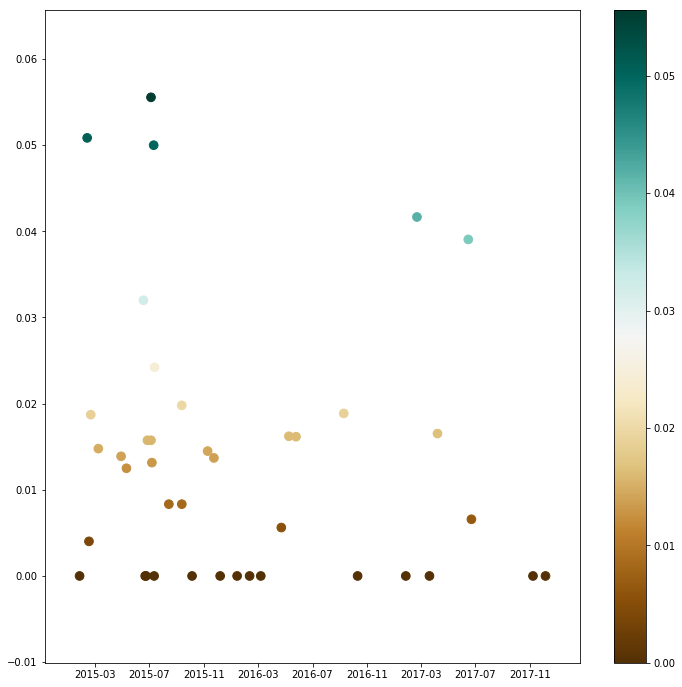

In [44]:

fig, ax = plt.subplots(figsize=(12,12))
points = plt.scatter(x = dijsselbloem_df.index, y = dijsselbloem_df.fear, s=75, c=dijsselbloem_df.fear,  cmap="BrBG")

plt.colorbar(points)
sns.regplot(x = dijsselbloem_df.index, y = dijsselbloem_df.fear, data=dijsselbloem_df, scatter=False, color='r',fit_reg=True)


ax = plt.gca()
xticks = ax.get_xticks()
xticks_dates = [datetime.datetime.fromtimestamp(dijsselbloem_df.index).strftime('%Y-%m-%d %H:%M:%S') for x in xticks]

plt.plot(np.unique(points), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
#xticks_dates = [dijsselbloem_df.index.strftime('%Y') for x in xticks]
ax.set_xticklabels(xticks_dates)
ax.set_ylim(0,0.3)



    # Add correlation line
#     axes = plt.gca()
#     m, b = np.polyfit(x, y, 1)
#     X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
#     plt.plot(X_plot, m*X_plot + b, '-')


# fig, ax = plt.subplots(figsize=(12,12))
# ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.fear)
# ax.scatter(x= moscovici_df.index, y = moscovici_df.fear, color='red')
# ax.scatter(x= regling_df.index, y = regling_df.fear, color='green')
# ax.scatter(x= statement_df.index, y = statement_df.fear, color='purple')







In [67]:
dijsselbloem_df['date'] = dijsselbloem_df.index
dijsselbloem_df.dtypes

Speaker                 object
speech                  object
positivity             float64
anger                  float64
anticipation           float64
disgust                float64
fear                   float64
joy                    float64
date            datetime64[ns]
dtype: object

In [74]:
dijsselbloem_df.date

,Speaker,speech,positivity,anger,anticipation,disgust,fear,joy,date,date_delta
date,,,,,,,,,,
2015-01-26,Jeroen Dijsselbloem,Good evening and welcome to this press confere...,0.265957,0.010638,0.127660,0.010638,0.000000,0.042553,2015-01-26,2015-01-26
2015-02-12,Jeroen Dijsselbloem,"Today, as you well know, we had an extra Eurog...",0.338983,0.033898,0.169492,0.016949,0.050847,0.118644,2015-02-12,2015-02-12
2015-02-16,Jeroen Dijsselbloem,"Then turning to the Greece, as you remember th...",0.220884,0.008032,0.088353,0.008032,0.004016,0.020080,2015-02-16,2015-02-16
2015-02-20,Jeroen Dijsselbloem,Good evening and welcome to this press confere...,0.259358,0.005348,0.109626,0.005348,0.018717,0.058824,2015-02-20,2015-02-20
2015-03-09,Jeroen Dijsselbloem,After the last Eurogroup decision on the exten...,0.290640,0.014778,0.078818,0.004926,0.014778,0.064039,2015-03-09,2015-03-09


In [86]:
dijsselbloem_df.date = time.mktime(datetime.datetime.strptime(dijsselbloem_df.date[0], "%Y/%m/%d").timetuple())

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

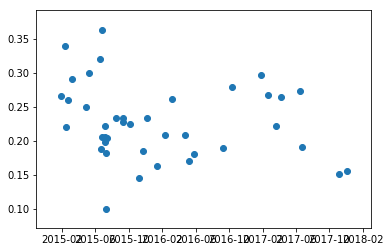

In [71]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.positivity)



In [ ]:
some_df[column] = time.mktime(datetime.datetime.strptime(some_df[column], “%Y/%m/%d”).timetuple()) 